In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import geopandas as gpd

In [3]:
import povertymapping.ookla_data_proc as ookla

In [4]:
import sys

In [5]:
ookla_config = dict(
        save_path="../test_data/real_outputs/ookla_kh",
        repo_path="../data/SVII_PH_KH_MM_TL",
        data_dir="kh",
        country="kh",
        ookla_folder="ookla_kh",
        hdx_folder="hdx_kh",
        dhs_folder="dhs_kh",
        dhs_geo_zip_folder="KHGE71FL",
        dhs_zip_folder="KHHR73DT",
        crs="4683",
        ookla_feature="avg_d_mbps",
        boundary_file="khm_admbnda_adm3_gov_20181004",
        year="2019",
        quarter="2",
        sample=False,
        random_sample=False,
        no_samples=60,
        random_seed=42,
        clust_rad=2000,
        plot_ookla_features=True,
        adm_level=3,
        use_pcode=True,
        shape_label='ADM3_PCODE',
        bins=6,
        show_legend=False,
    )

# you can also create a yaml file or json file
# and load it in.

In [6]:
from pathlib import Path

In [7]:
# uncomment and run the following to clear out the preprocessed files 
!rm -rf {ookla_config['save_path']}
!mkdir -p {ookla_config['save_path']}

In [8]:
cluster_coords_path = Path(ookla_config['save_path'])/'..'/ookla_config['dhs_folder']/f"{ookla_config['dhs_geo_zip_folder']}_cluster_coords.csv"

In [9]:
!cp {cluster_coords_path} {ookla_config['save_path']}/.

In [10]:
%%time
ookla.process_ookla_data(ookla_config)

Adding buffer geometry...


100%|█████████████████████████████████████████████████████████████████████████████████| 611/611 [00:11<00:00, 51.19it/s]
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/povertymapping/utils/data_utils.py:449: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  geometry_and_cluster_features.groupby(group_indices).mean().reset_index()
/home/butchtm/work/povmap/unicef-ai4d-poverty-mapping/env/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


CPU times: user 14.4 s, sys: 1.28 s, total: 15.7 s
Wall time: 14.9 s


<Figure size 1200x1000 with 0 Axes>

Check that the preprocessed files have been created

In [11]:
ookla_df_path = Path(ookla_config['save_path'])/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_{ookla_config['ookla_feature']}.csv"

In [12]:
ookla_df = pd.read_csv(ookla_df_path)

In [13]:
len(ookla_df)

339

In [14]:
ookla_df.head()

,Unnamed: 0,DHSID,avg_d_mbps
0,0,KH201400000001,6.662091
1,1,KH201400000003,3.840000
2,2,KH201400000005,5.450905
3,3,KH201400000012,1.844000
4,4,KH201400000015,8.828900


In [15]:
use_pcode = ookla_config["use_pcode"]
adm_level = ookla_config["adm_level"]
if use_pcode:
    aggregate = f"pcode_adm{adm_level}"       
else:
    aggregate = ookla_config["shape_label"]


In [16]:
ookla_by_adm_gdf_path = Path(ookla_config['save_path'])/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_{ookla_config['ookla_feature']}_by_{aggregate.lower()}.geojson"

In [17]:
ookla_by_adm_gdf = gpd.read_file(ookla_by_adm_gdf_path)

In [18]:
len(ookla_by_adm_gdf)

1633

In [19]:
ookla_by_adm_gdf.head()

,ADM3_PCODE,ADM3_EN,DHSYEAR,DHSCLUST,ADM1FIPS,ADM1FIPSNA,ADM1SALBNA,ADM1SALBCO,ADM1DHS,DHSREGCO,LATNUM,LONGNUM,ALT_GPS,ALT_DEM,avg_d_mbps,index_right,Shape_Leng,Shape_Area,geometry
0,KH110202,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((107.33712 13.31783, 107.33889 13.315..."
1,KH060309,Achar Leak,2014.0,141.857143,None,None,None,None,6.0,5.0,12.718982,104.900968,9999.0,14.142857,10.264405,1.0,0.094650,0.000522,"POLYGON ((104.91792 12.74082, 104.91652 12.737..."
2,KH160603,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((107.13571 13.77648, 107.13870 13.774..."
3,KH040801,None,NaN,NaN,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((104.62409 12.05304, 104.62152 12.050..."
4,KH080601,Akreiy Ksatr,2014.0,250.333333,None,None,None,None,12.0,8.0,11.560091,104.936259,9999.0,15.333333,16.086851,4.0,0.159472,0.001303,"POLYGON ((104.98247 11.58139, 104.98229 11.576..."


In [20]:
len(ookla_by_adm_gdf)

1633

In [21]:
ookla_by_adm_gdf.avg_d_mbps.isna().sum()

1054

In [22]:
if use_pcode:
    group_indices = [f"ADM{adm_level}_PCODE", f"ADM{adm_level}_EN"]
else:
    group_indices = [ookla_config["shape_label"]]


In [23]:
with_data = ookla_by_adm_gdf[ookla_by_adm_gdf.avg_d_mbps.notna()][[*group_indices,'DHSCLUST',ookla_config['ookla_feature'],'geometry']] 
with_data.head()

,ADM3_PCODE,ADM3_EN,DHSCLUST,avg_d_mbps,geometry
1,KH060309,Achar Leak,141.857143,10.264405,"POLYGON ((104.91792 12.74082, 104.91652 12.737..."
4,KH080601,Akreiy Ksatr,250.333333,16.086851,"POLYGON ((104.98247 11.58139, 104.98229 11.576..."
6,KH030601,Ampil,39.000000,13.343667,"POLYGON ((105.44427 12.00596, 105.44409 11.999..."
7,KH171011,Ampil,330.000000,7.016000,"POLYGON ((103.97251 13.42729, 103.97831 13.426..."
13,KH040501,Ampil Tuek,80.000000,4.304000,"POLYGON ((104.88312 12.06738, 104.88672 12.062..."


In [24]:
len(with_data)

579

In [25]:
orig_ookla_gdf_path = Path(ookla_config['repo_path'])/ookla_config['data_dir']/ookla_config['ookla_folder']/f"{ookla_config['country']}_{ookla_config['year']}_{ookla_config['quarter']}_ookla.geojson"

In [26]:
orig_ookla_gdf = gpd.read_file(orig_ookla_gdf_path)

In [27]:
orig_ookla_gdf.head()

,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,index_right,Shape_Leng,Shape_Area,ADM3_EN,...,ADM2_EN,ADM2_PCODE,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,1322123031332333,8093,9749,19,24,2,1577,0.830786,0.037343,Tum Ring,...,Sandan,KH0606,Kampong Thom,KH06,Cambodia,KH,2014-10-14,2018-10-04,None,"POLYGON ((105.41793 12.90459, 105.42342 12.904..."
1,1322123031333222,8503,9822,52,2,2,1577,0.830786,0.037343,Tum Ring,...,Sandan,KH0606,Kampong Thom,KH06,Cambodia,KH,2014-10-14,2018-10-04,None,"POLYGON ((105.42342 12.90459, 105.42891 12.904..."
2,1322123032332302,3026,4486,44,1,1,1441,0.433017,0.004314,Tang Krasang,...,Santuk,KH0607,Kampong Thom,KH06,Cambodia,KH,2014-10-14,2018-10-04,None,"POLYGON ((105.04988 12.57238, 105.05537 12.572..."
3,1322123032332203,10902,11395,10,2,1,1441,0.433017,0.004314,Tang Krasang,...,Santuk,KH0607,Kampong Thom,KH06,Cambodia,KH,2014-10-14,2018-10-04,None,"POLYGON ((105.03340 12.57238, 105.03889 12.572..."
4,1322123032332212,3855,6334,20,10,3,1441,0.433017,0.004314,Tang Krasang,...,Santuk,KH0607,Kampong Thom,KH06,Cambodia,KH,2014-10-14,2018-10-04,None,"POLYGON ((105.03889 12.57238, 105.04438 12.572..."


In [28]:
orig_ookla_gdf["avg_d_mbps"] = orig_ookla_gdf["avg_d_kbps"]/1000
orig_ookla_gdf["avg_u_mbps"] = orig_ookla_gdf["avg_u_kbps"]/1000

In [29]:
import matplotlib.pyplot as plt

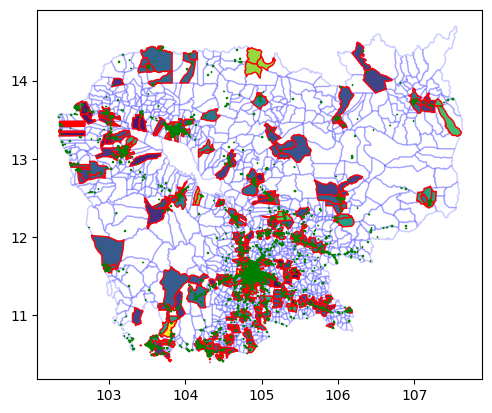

In [30]:
ax = plt.axes()
ax = ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='blue', alpha=0.2)
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='green', ax=ax)

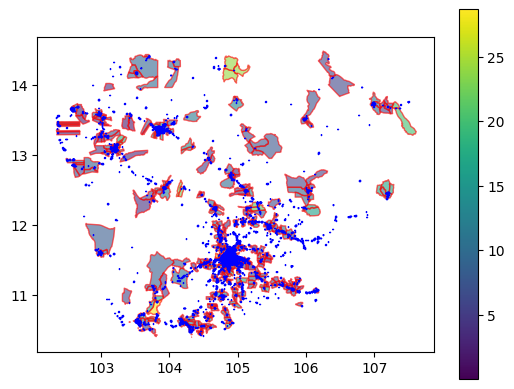

In [31]:
ax = plt.axes()
ax = with_data.plot(column='avg_d_mbps',edgecolor='red', ax=ax, legend=True, alpha=0.6)
ax = orig_ookla_gdf.plot(column='avg_d_mbps',edgecolor='blue', ax=ax)

In [32]:
img_path = (Path(ookla_config['save_path'])/f'{ookla_config["boundary_file"]}_{ookla_config["ookla_feature"]}.jpeg').as_posix(); img_path

'../test_data/real_outputs/ookla_kh/khm_admbnda_adm3_gov_20181004_avg_d_mbps.jpeg'

In [33]:
from PIL import Image

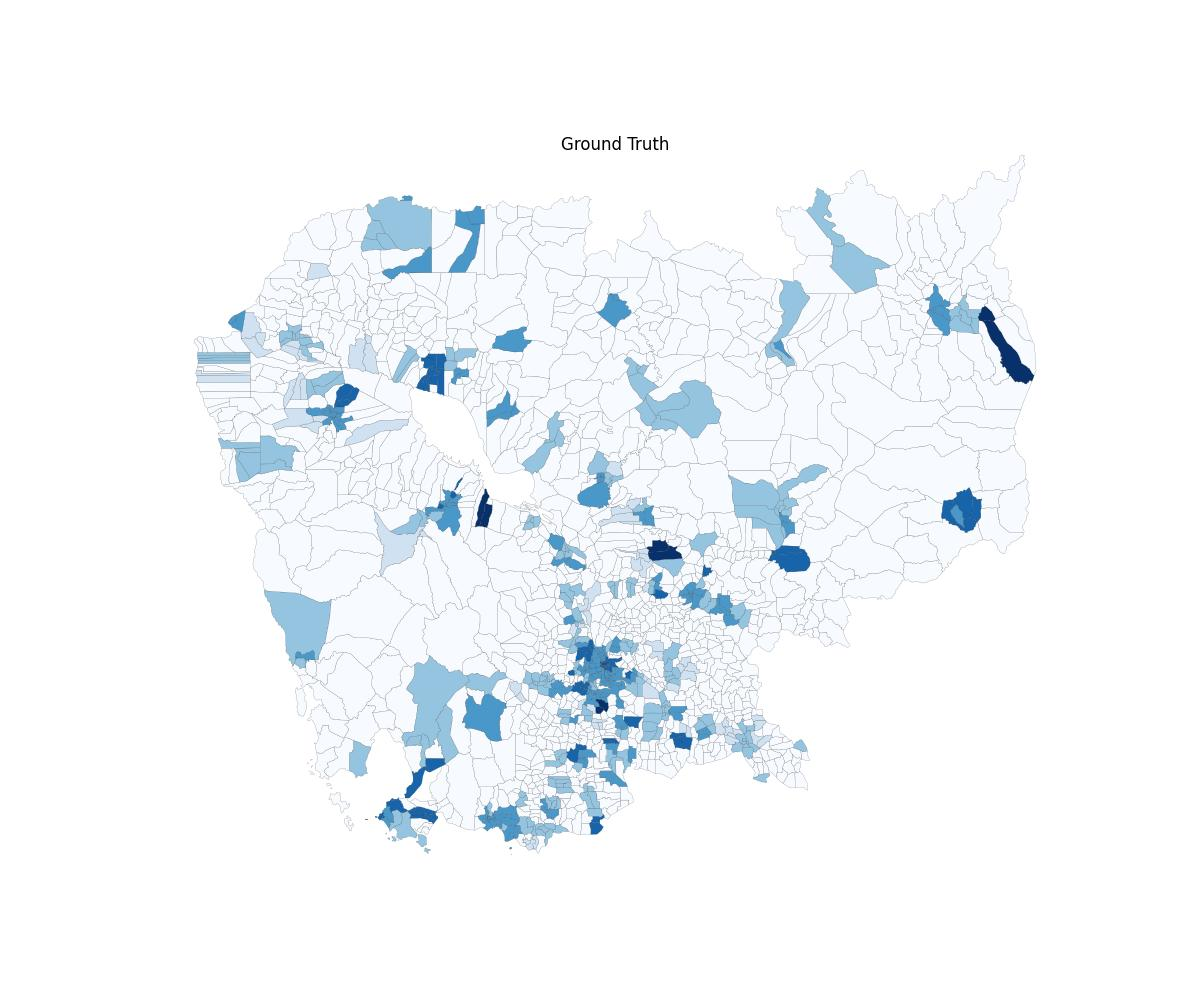

In [34]:
img = Image.open(img_path); img

In [35]:
dhs_by_cluster_path = Path(ookla_config['save_path'])/'..'/ookla_config['dhs_folder']/f"{ookla_config['dhs_zip_folder']}_{ookla_config['dhs_geo_zip_folder']}_by_cluster.geojson"

In [36]:
dhs_by_cluster = gpd.read_file(dhs_by_cluster_path)

In [37]:
len(dhs_by_cluster)

611

In [38]:
dhs_by_cluster.columns.values

array(['DHSCLUST', 'Wealth Index', 'DHSID', 'DHSCC', 'DHSYEAR', 'CCFIPS',
       'ADM1FIPS', 'ADM1FIPSNA', 'ADM1SALBNA', 'ADM1SALBCO', 'ADM1DHS',
       'ADM1NAME', 'DHSREGCO', 'DHSREGNA', 'SOURCE', 'URBAN_RURA',
       'LATNUM', 'LONGNUM', 'ALT_GPS', 'ALT_DEM', 'DATUM', 'geometry'],
      dtype=object)

In [39]:
dhs_data = dhs_by_cluster[["DHSCLUST","DHSID","Wealth Index","geometry","LATNUM","LONGNUM"]].copy()
dhs_data.head()

,DHSCLUST,DHSID,Wealth Index,geometry,LATNUM,LONGNUM
0,1,KH201400000001,-7443.192308,POINT (103.02839 13.51868),13.518676,103.028394
1,2,KH201400000002,2622.678571,POINT (102.95385 13.39840),13.398398,102.953852
2,3,KH201400000003,22167.920000,POINT (102.99600 13.50345),13.503451,102.996001
3,4,KH201400000004,32241.826087,POINT (103.07142 13.54940),13.549399,103.071416
4,5,KH201400000005,154111.500000,POINT (103.02899 13.53887),13.538865,103.028993


In [40]:
dhs_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
from povertymapping.utils.data_utils import add_buffer_geom

In [42]:
add_buffer_geom(dhs_data, r=ookla_config['clust_rad'])

Adding buffer geometry...


100%|█████████████████████████████████████████████████████████████████████████████████| 611/611 [00:11<00:00, 52.95it/s]


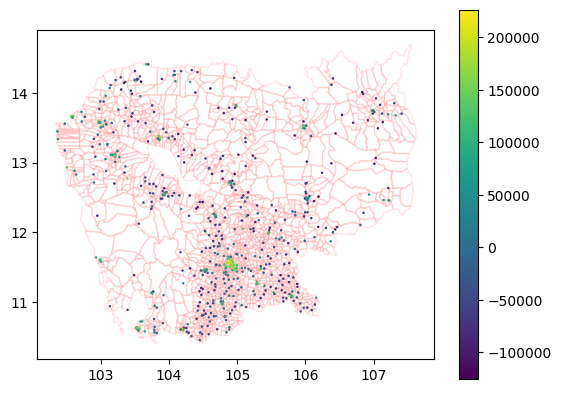

In [44]:
ax = plt.axes()
ax= ookla_by_adm_gdf.plot(facecolor='none',ax=ax,edgecolor='red', alpha=0.1)
ax = dhs_data.plot(column="Wealth Index", ax=ax, legend=True)